# EDA of the data

### Data Preprocessing
Preprocessing helps to improve the performance of the model significantly.
It consists of several steps. 
This section explains how the preprocessing is done for the airfoil noise dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('airfoil_self_noise.dat',sep='\t',header=None)

Here we are trying to read a CSV file named 'airfoil_self_noise.dat' using the pandas library in Python. 

In [5]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


As we can see there are no feature name so we are going to add the column name which are features of header

In [6]:
df.columns=['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction side','Sound pressure level']

1. Frequency, in Hertz.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.
6. Scaled sound pressure level, in decibels.

The target variable in this data set is Scaled sound pressure level, in decibels.
Here the all feature are independent only the Scaled sound pressure level is dependent on the all independent features

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,Sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


### Missing values

In [9]:
df.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
Sound pressure level    0
dtype: int64

As we can see there is no null values inside my dataset 

In [10]:
import numpy as np

outliers = []
threshold = 3  # Threshold for Z-score method (3 standard deviations)

for feature in df.columns:
    mean = np.mean(df[feature])
    std = np.std(df[feature])
    
    for i in df[feature]:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    print(feature ," ",outliers)
    outliers.clear()  # Clear the list before processing the next column


Frequency   [12500, 16000, 12500, 12500, 12500, 16000, 12500, 12500, 12500, 16000, 20000, 12500, 16000, 20000, 12500, 16000, 12500, 16000, 12500, 16000, 12500, 12500, 12500, 12500, 12500, 12500, 12500, 16000, 20000, 12500, 16000, 20000, 12500, 16000, 12500, 16000, 12500, 16000, 20000, 12500, 16000, 20000, 12500, 12500]
Angle of attack   []
Chord length   []
Free-stream velocity   []
Suction side   [0.0584113, 0.0584113, 0.0584113, 0.0584113, 0.0584113, 0.0584113, 0.0584113, 0.0584113, 0.0584113, 0.0584113, 0.0584113, 0.0584113, 0.0584113, 0.0584113, 0.0584113, 0.0584113, 0.0528487, 0.0528487, 0.0528487, 0.0528487, 0.0528487, 0.0528487, 0.0528487, 0.0528487, 0.0528487, 0.0528487, 0.0528487, 0.0528487, 0.0528487, 0.0528487, 0.0528487, 0.0528487]
Sound pressure level   [104.13, 103.38]


### Outliers

A common value for the threshold is 3, which corresponds to identifying data points that are more than three standard deviations away from the mean as outliers.

As we can see that the frequency has the more outliers and the suction Side data also has the more outlier then the rest of features

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
sns.boxplot(X_train['Frequency'])

<Axes: >

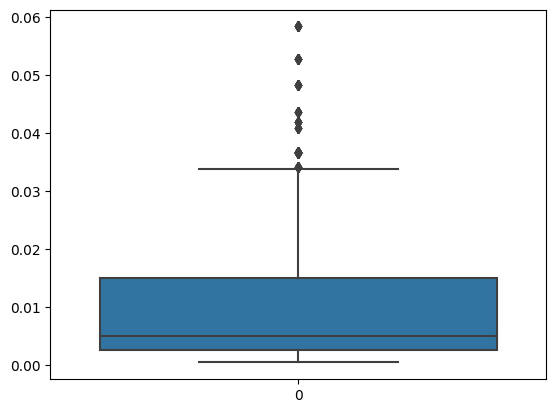

In [ ]:
sns.boxplot(X_train['Suction side'])

<Axes: >

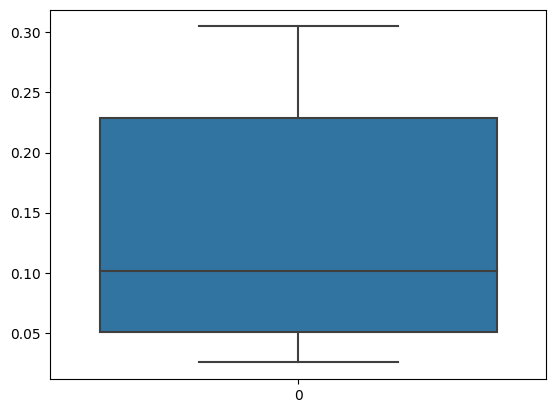

In [ ]:
sns.boxplot(X_train['Chord length'])

### conclusion

We are using the boxplot to see if there is outlier are present or not. From the above it is clear that the Frequency feature and Suction side feature contain more outlier outliers 

Text(0.5, 1.0, 'Frequency Vs Sound pressure level')

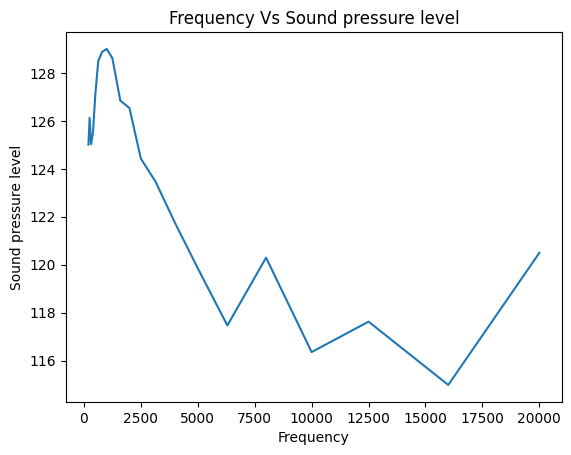

In [ ]:
df.groupby('Frequency')['Sound pressure level'].median().plot()
plt.xlabel('Frequency')
plt.ylabel('Sound pressure level')
plt.title('Frequency Vs Sound pressure level')

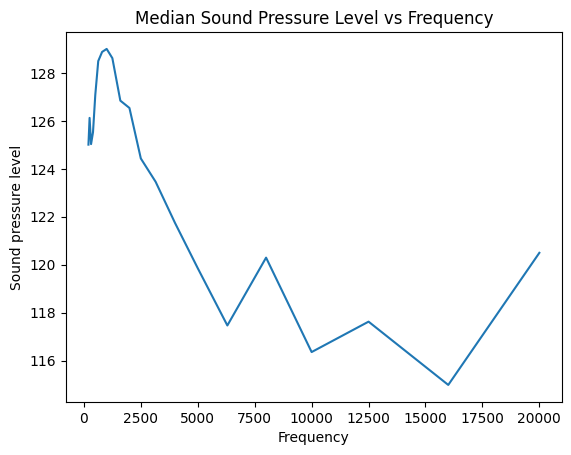

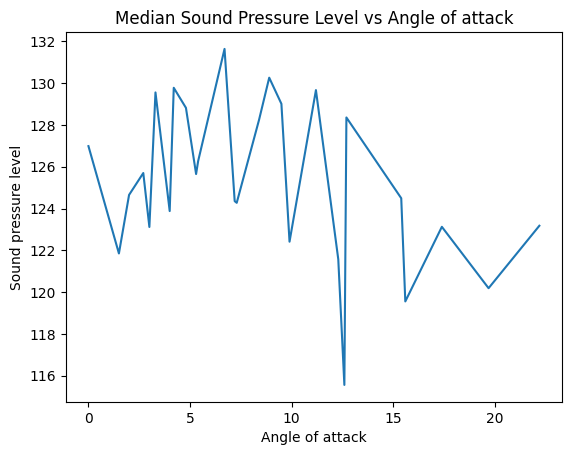

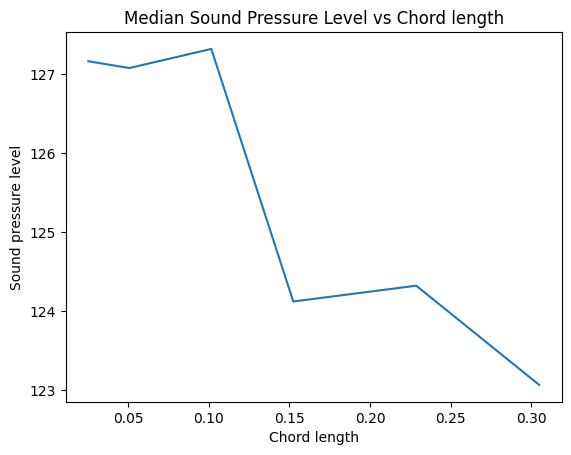

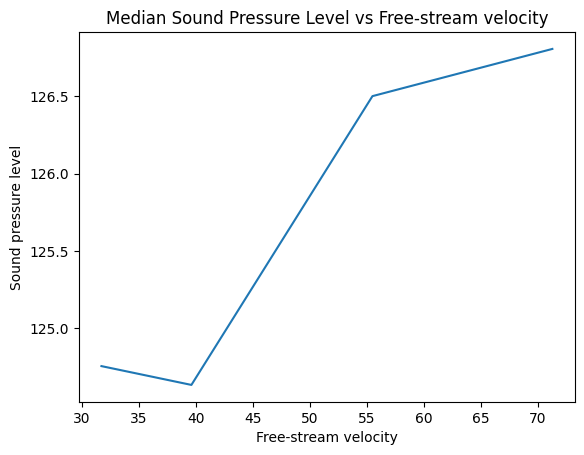

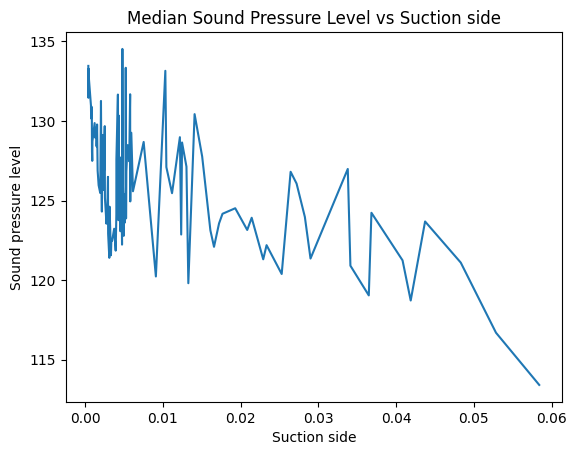

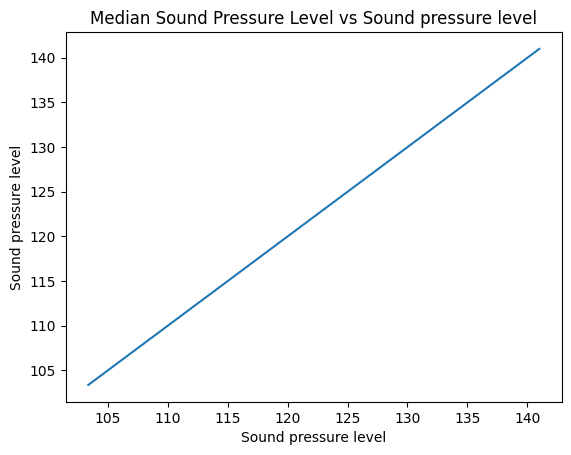

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

target_column = 'Sound pressure level'

for feature in df.columns:
    plt.figure()  # Create a new figure for each feature
    df.groupby(feature)[target_column].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Sound pressure level')
    plt.title(f'Median Sound Pressure Level vs {feature}')

plt.show()
 

### Conclusion

here we are able to see that there is as frequency increase the Sound Pressure is decrease and then again it is slidly increase

As The Chord length is increasing the values of  the Sound Pressure is decrease

Free stream velocity incearse with Sound pressure also increase and there is slide change is graph of Suction side data and  the Sound Pressure is decrease

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

It is good to seperate the train and test data so we can predicate the values for new data in testing and so machine learning model are not going to overfit

### vistualization

we are coverting or representing the data in the form of graph so it is understand easily

In [11]:
import seaborn as sns

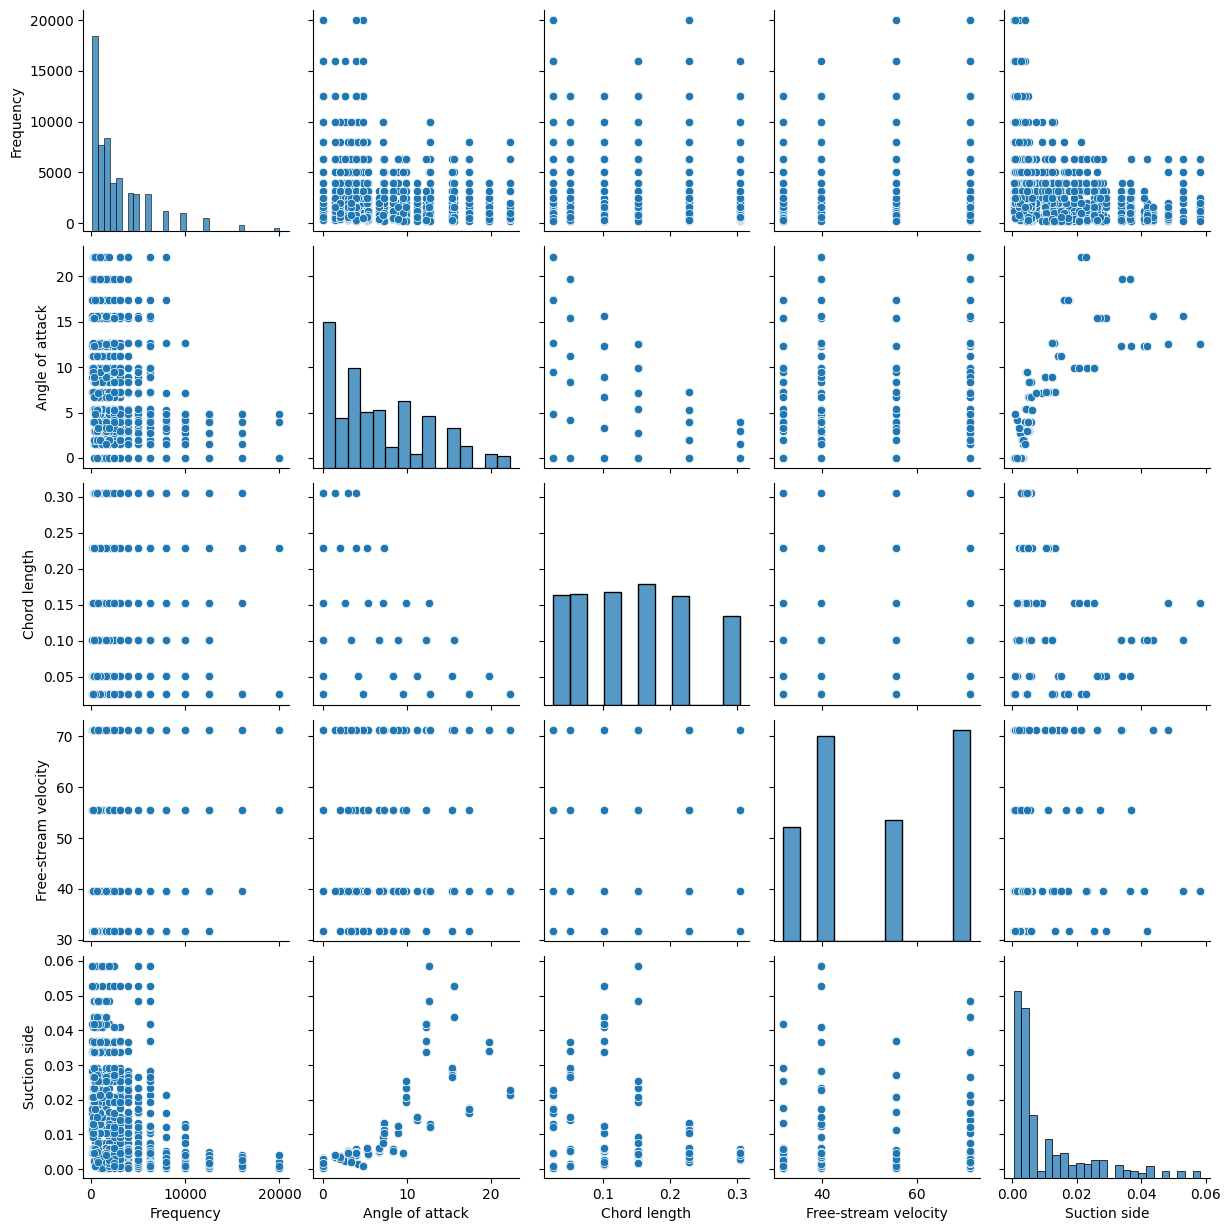

In [12]:
sns.pairplot(X_train)

### Correlation

<Axes: >

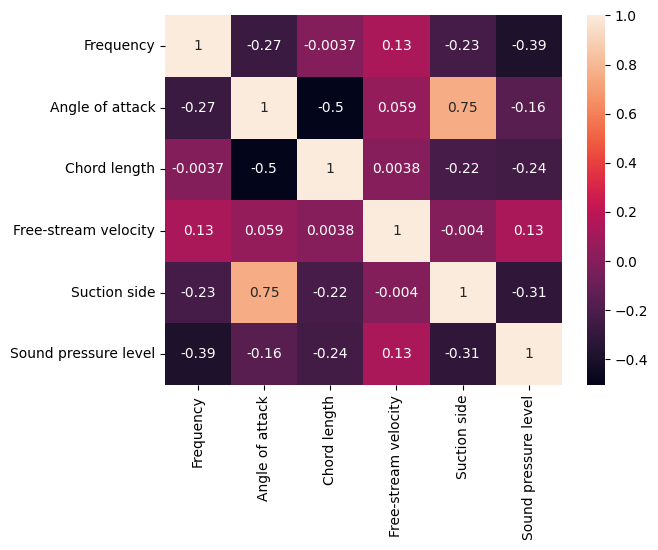

In [7]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [13]:
X_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Chord length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction side,-0.239878,0.762567,-0.220849,-0.000519,1.000000


### If you are looking at feature reduction, select features with a correlation close to 0

#### If two features are independent features are correlated then and if there corr values is close to +1 or -1 then out of two feature only one features are taken

we can see that there are too many outlier in the ferquency feature we are going to remove this outlier to make the model more accurt

<Axes: >

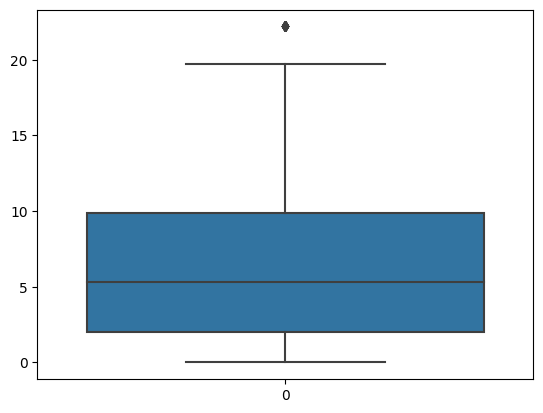

In [15]:
sns.boxplot(X_train['Angle of attack'])

### scatter chart with the scaled sound pressure level versus the frequency.

<Axes: xlabel='Frequency', ylabel='Sound pressure level'>

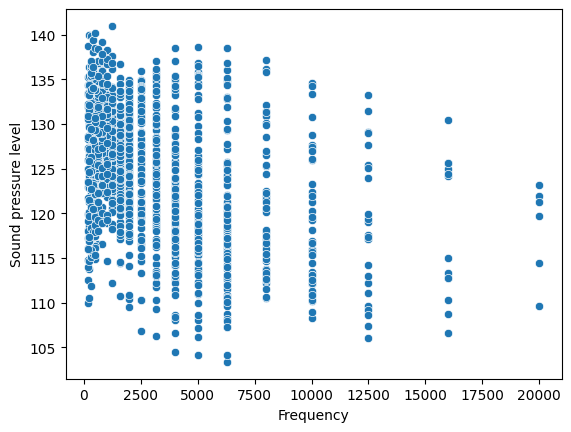

In [16]:
sns.scatterplot(x='Frequency', y='Sound pressure level', data=df)

In general, the more frequency, the less scaled sound pressure level. However, the scaled sound pressure level depends on all the inputs simultaneously.

In [17]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,Sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


(array([ 10.,  43.,  79., 152., 214., 272., 336., 261., 118.,  18.]),
 array([103.38  , 107.1407, 110.9014, 114.6621, 118.4228, 122.1835,
        125.9442, 129.7049, 133.4656, 137.2263, 140.987 ]),
 <BarContainer object of 10 artists>)

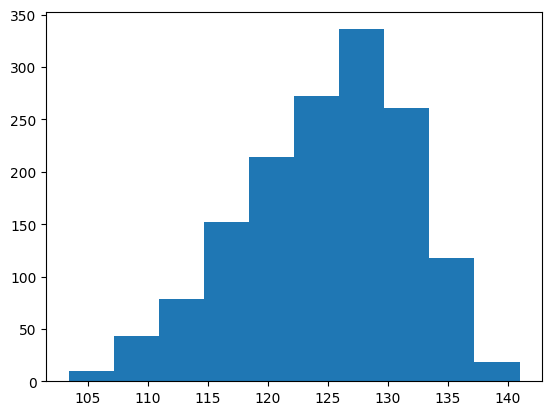

In [42]:
plt.hist(df['Sound pressure level'])

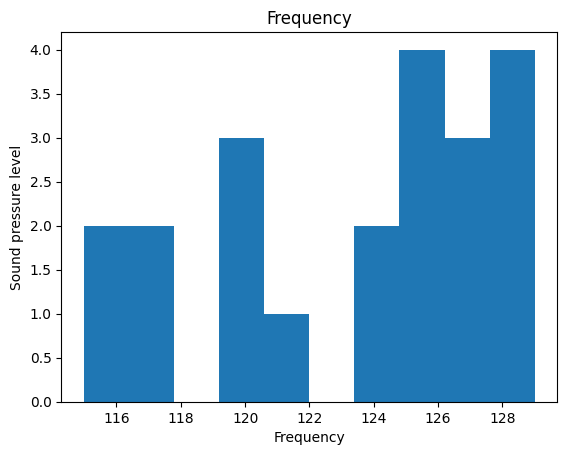

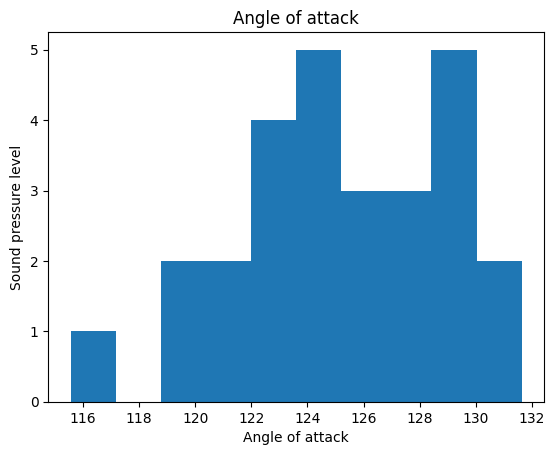

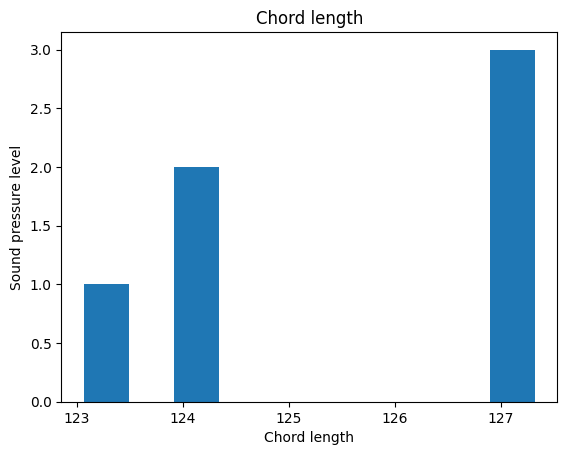

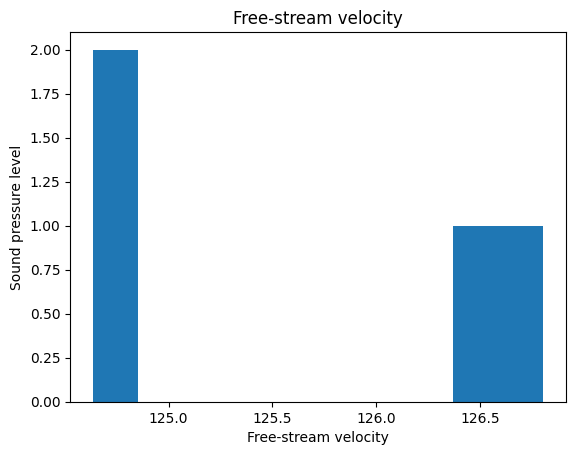

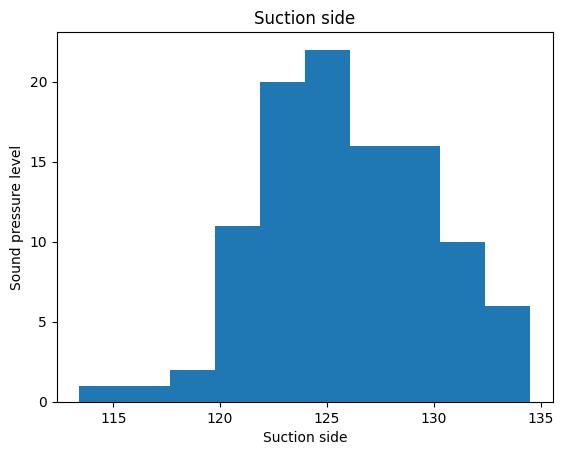

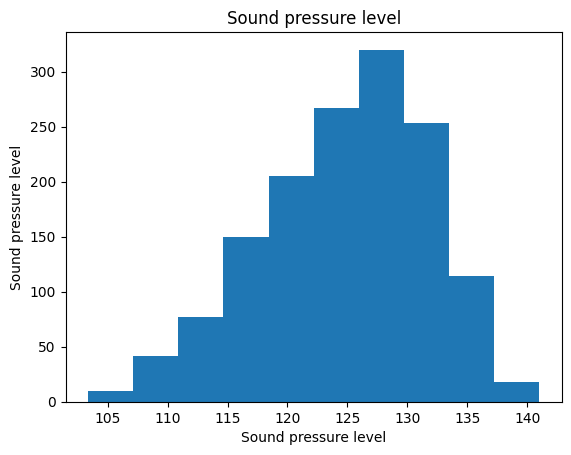

In [43]:
data = df.copy()
for feature in data.columns:
    data.groupby(feature)['Sound pressure level'].median().plot.hist()
    plt.xlabel(feature)
    plt.ylabel('Sound pressure level')
    plt.title(feature)
    plt.show()

There is Normal distribution between Suction side and the Sound pressure level